In [ ]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# !pip install -U kaleido

## Loading Numerical Dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Numeric Data/Final_Meteorological_Data.csv")
print(data.shape)
data.head()

(8888, 22)


,DATETIME,Avg BRBG Total Cloud Cover [%],Avg CDOC Total Cloud Cover [%],Avg CDOC Thick Cloud Cover [%],Avg CDOC Thin Cloud Cover [%],Avg Sun Flag,Avg HCF Value,Avg Blue/Red_min,Avg Blue/Red_mid,Avg Blue/Red_max,...,Avg Zenith Angle [degrees],Avg Azimuth Angle [degrees],Avg Solar Eclipse Shading,Avg Tower Dew Point Temp [deg C],Avg Total Cloud Cover [%],Avg Opaque Cloud Cover [%],Avg Avg Wind Speed @ 6ft [m/s],Avg Precipitation [mm],Avg Moisture,Avg Albedo (CMP11)
0,2021-10-08 07:00:00,13.6667,36.8333,0.0000,36.8333,8.0,1.0367,0.9617,1.5850,3.1533,...,85.6866,101.5014,0,-1.1220,19.9667,10.4667,2.1028,0.0,0.0,0.2815
1,2021-10-08 08:00:00,56.1667,53.6667,26.0000,27.6667,3.5,1.0217,0.9333,1.4367,3.3533,...,74.7881,111.7340,0,-1.0662,61.8333,47.8667,0.8334,0.0,0.0,0.2330
2,2021-10-08 09:00:00,73.0000,66.3333,43.8333,22.5000,3.0,1.0517,0.9267,1.2800,2.6533,...,64.6156,123.3821,0,-0.2234,91.6167,77.2333,0.3564,0.0,0.0,0.2085
3,2021-10-08 10:00:00,38.8333,54.1667,18.0000,36.1667,3.0,1.0300,0.9367,1.4500,3.0850,...,55.8601,137.3319,0,0.5125,69.7667,39.2167,1.8796,0.0,0.0,0.2065
4,2021-10-08 11:00:00,62.3333,51.3333,25.1667,26.1667,3.0,1.0550,0.9850,1.2700,2.0233,...,49.3991,154.2831,0,-0.3288,91.8833,69.2000,2.6331,0.0,0.0,0.2002


In [ ]:
def get_dataframe(df, flag=0):
  """
  NOTE: for ASI16_2021_1931528_39.74_-105.19_2021.csv dataset set flag to 1

  params:
  - df (dataframe): dataframe before preprocessing
  does:
  - preprocesses the dataframe, extracts numeric data and additional information regarding the dataset
  - creates a new column "date" with datetime values of format "%y %m %d %h %m"
  returns: df (dataframe) to working with, df_info (dict) containing additional information about the dataset
  """
  if flag==0:
    # changing date column type to datetime type
    data["DATE (YYYY/MM/DD)"] = pd.to_datetime(data["DATETIME"])

    # dropping original object type date col
    df = data.iloc[:,1:]

    df = df[df["Avg CDOC Total Cloud Cover [%]"] !=-99999 ] # remove outliers

    #dropping unnecessary columns
    df.pop("Avg File Extension")
    df.pop("Avg Solar Eclipse Shading")

    # creating year and month columns
    df_eda = df.copy()
    df_eda["Year"] = pd.DatetimeIndex(df["DATE (YYYY/MM/DD)"]).year
    df_eda["Month"] = pd.DatetimeIndex(df["DATE (YYYY/MM/DD)"]).month
    df_eda["Hour"] = pd.DatetimeIndex(df["DATE (YYYY/MM/DD)"]).hour
    return df, df_eda, None
  else:
    return None, None, None

  # df_info = dict(zip(df.columns.tolist(), df.iloc[0,:].tolist()))
  # cols = df.iloc[1,:23].tolist()
  # df = df.iloc[2:,:len(cols)]
  # df.columns = cols
  # df = df.reset_index(drop=True)

  # date = []
  # for i in range(len(df)):
  #   date_list = " ".join([str(df.loc[i,"Year"]), str(df.loc[i,"Month"]), str(df.loc[i,"Day"]), str(df.loc[i,"Hour"]), str(df.loc[i,"Minute"])])
  #   date.append(datetime.datetime.strptime(date_list, '%Y %m %d %H %M'))
  # df["Date"] = date
  # return df, df_info

In [ ]:
def filter_by_month(df, year=2021, month=1, day=1, freq=1):
  """
  params:
  - df (dataframe): dataset after preprocessing
  - year (str): numeric str, expected to be 2021 or 2022, represents year
  - month (str): numeric str in the range 1 to 12, represents month
  - day (str): numeric str in the range 1 to 31, represents day
  does: filters the dataframe based on the provided parameters
  returns: subset of df (dataframe)
  """
  if month+freq>12:
    if year==2023:
      print(f"start date\t:{datetime(year, month, day)}")
      print(f"end date\t:{datetime(2023, abs(12-month+freq), 31)}")
      return df.loc[(df["DATE (YYYY/MM/DD)"]>=datetime(year, month, day))&(df["DATE (YYYY/MM/DD)"]<datetime(2023, abs(12-month+freq), 31))]
    else:
      print(f"start date\t:{datetime(year, month, day)}")
      print(f"end date\t:{datetime(year+1, abs(12-month+freq), day)}")
      return df.loc[(df["DATE (YYYY/MM/DD)"]>=datetime(year, month, day))&(df["DATE (YYYY/MM/DD)"]<datetime(year+1, abs(12-month+freq), day))]
  else:
    print(f"start date\t:{datetime(year, month, day)}")
    print(f"end date\t:{datetime(year, month+freq, day)}")
    return df.loc[(df["DATE (YYYY/MM/DD)"]>=datetime(year, month, day))&(df["DATE (YYYY/MM/DD)"]<datetime(year, month+freq, day))]
  # return df.loc[(df["Date"]>=f"{str(year)}-{str(month)}-{str(day)} 00:00:00")&(df["Date"]<=f"{str(year)}-{str(month)}-{str(day)} 23:50:00")]


def filter_by_year(df, start_year=2021, end_year=None):
  """
  params:
  - df (dataframe): dataset after preprocessing
  - year (str): numeric str, expected to be 2021 or 2022, represents year
  - month (str): numeric str in the range 1 to 12, represents month
  - day (str): numeric str in the range 1 to 31, represents day
  does: filters the dataframe based on the provided parameters
  returns: subset of df (dataframe)
  """
  if end_year==None:
    return df.loc[df["Year"]==start_year]
  else:
    return df.loc[(df["Year"]>=start_year)&(df["Year"]<=end_year)]

In [ ]:
df, df_eda, df_info = get_dataframe(data)
# df.info()

In [ ]:
print(df.shape)
df.head()

(8788, 20)


,Avg BRBG Total Cloud Cover [%],Avg CDOC Total Cloud Cover [%],Avg CDOC Thick Cloud Cover [%],Avg CDOC Thin Cloud Cover [%],Avg Sun Flag,Avg HCF Value,Avg Blue/Red_min,Avg Blue/Red_mid,Avg Blue/Red_max,Avg Global CMP22 (vent/cor) [W/m^2],Avg Zenith Angle [degrees],Avg Azimuth Angle [degrees],Avg Tower Dew Point Temp [deg C],Avg Total Cloud Cover [%],Avg Opaque Cloud Cover [%],Avg Avg Wind Speed @ 6ft [m/s],Avg Precipitation [mm],Avg Moisture,Avg Albedo (CMP11),DATE (YYYY/MM/DD)
0,13.6667,36.8333,0.0000,36.8333,8.0,1.0367,0.9617,1.5850,3.1533,63.8407,85.6866,101.5014,-1.1220,19.9667,10.4667,2.1028,0.0,0.0,0.2815,2021-10-08 07:00:00
1,56.1667,53.6667,26.0000,27.6667,3.5,1.0217,0.9333,1.4367,3.3533,176.1522,74.7881,111.7340,-1.0662,61.8333,47.8667,0.8334,0.0,0.0,0.2330,2021-10-08 08:00:00
2,73.0000,66.3333,43.8333,22.5000,3.0,1.0517,0.9267,1.2800,2.6533,361.7695,64.6156,123.3821,-0.2234,91.6167,77.2333,0.3564,0.0,0.0,0.2085,2021-10-08 09:00:00
3,38.8333,54.1667,18.0000,36.1667,3.0,1.0300,0.9367,1.4500,3.0850,582.2481,55.8601,137.3319,0.5125,69.7667,39.2167,1.8796,0.0,0.0,0.2065,2021-10-08 10:00:00
4,62.3333,51.3333,25.1667,26.1667,3.0,1.0550,0.9850,1.2700,2.0233,632.4995,49.3991,154.2831,-0.3288,91.8833,69.2000,2.6331,0.0,0.0,0.2002,2021-10-08 11:00:00


## EDA Begins

In [ ]:
df_eda.columns

Index(['Avg BRBG Total Cloud Cover [%]', 'Avg CDOC Total Cloud Cover [%]',
       'Avg CDOC Thick Cloud Cover [%]', 'Avg CDOC Thin Cloud Cover [%]',
       'Avg Sun Flag', 'Avg HCF Value', 'Avg Blue/Red_min', 'Avg Blue/Red_mid',
       'Avg Blue/Red_max', 'Avg Global CMP22 (vent/cor) [W/m^2]',
       'Avg Zenith Angle [degrees]', 'Avg Azimuth Angle [degrees]',
       'Avg Tower Dew Point Temp [deg C]', 'Avg Total Cloud Cover [%]',
       'Avg Opaque Cloud Cover [%]', 'Avg Avg Wind Speed @ 6ft [m/s]',
       'Avg Precipitation [mm]', 'Avg Moisture', 'Avg Albedo (CMP11)',
       'DATE (YYYY/MM/DD)', 'Year', 'Month', 'Hour'],
      dtype='object')

In [ ]:
# plot heatmap
map_data = df_eda.iloc[:,:-4]
# corr_pearson = map_data.corr()
# sns.heatmap(corr_pearson)
corr_spearman = map_data.corr(method='spearman')

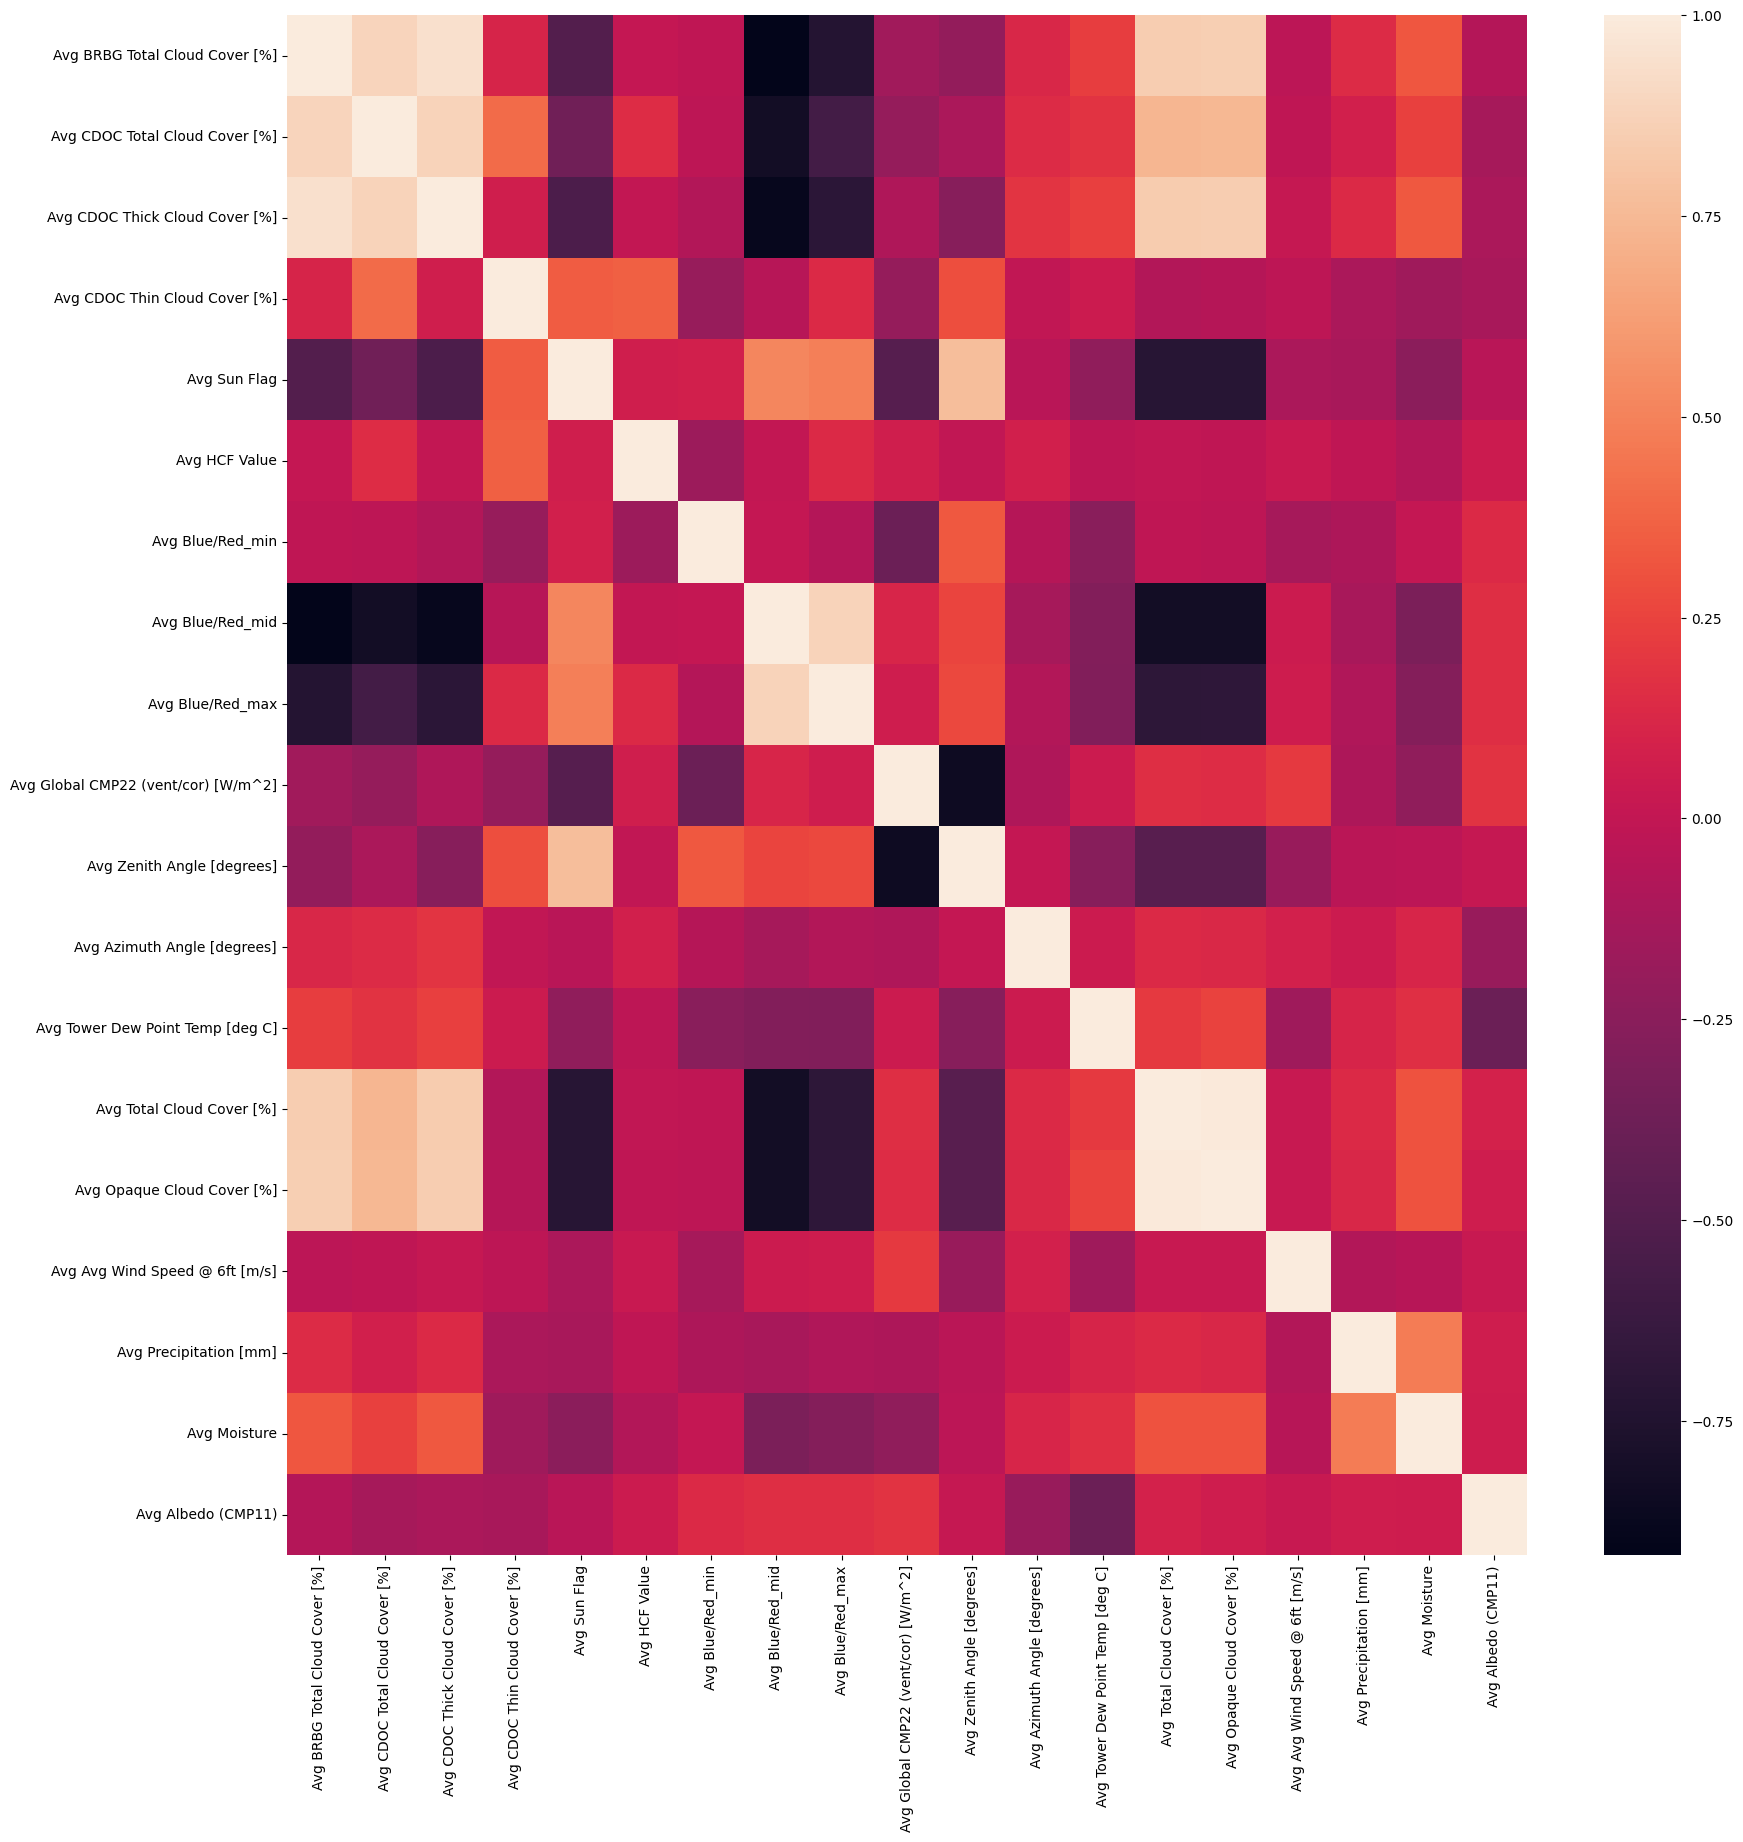

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_spearman)
# plt.savefig('heatmap_spearman.jpg')

In [ ]:
# Change in Dew Point Temperature
fig = px.line(df_eda, x="DATE (YYYY/MM/DD)", y="Avg Tower Dew Point Temp [deg C]")
fig.show()
# fig.write_image("date_VS_dew_temp.png")

We observe that the temperature increases from the month of April, peaks from July to September and starts to decline significantly from October. This pattern is repetitive over the years.

In [ ]:
df_eda.columns

Index(['Avg BRBG Total Cloud Cover [%]', 'Avg CDOC Total Cloud Cover [%]',
       'Avg CDOC Thick Cloud Cover [%]', 'Avg CDOC Thin Cloud Cover [%]',
       'Avg Sun Flag', 'Avg HCF Value', 'Avg Blue/Red_min', 'Avg Blue/Red_mid',
       'Avg Blue/Red_max', 'Avg Global CMP22 (vent/cor) [W/m^2]',
       'Avg Zenith Angle [degrees]', 'Avg Azimuth Angle [degrees]',
       'Avg Tower Dew Point Temp [deg C]', 'Avg Total Cloud Cover [%]',
       'Avg Opaque Cloud Cover [%]', 'Avg Avg Wind Speed @ 6ft [m/s]',
       'Avg Precipitation [mm]', 'Avg Moisture', 'Avg Albedo (CMP11)',
       'DATE (YYYY/MM/DD)', 'Year', 'Month', 'Hour'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
norm_cover = MinMaxScaler().fit_transform(np.array(df_eda["Avg Opaque Cloud Cover [%]"]).reshape(-1,1))
cloud_cover = norm_cover[:,0]
cloud_cover

array([0.11353168, 0.48382871, 0.77458713, ..., 0.24125446, 0.31617129,
       0.34389406])

In [ ]:
# fig = px.scatter(df_eda, y=df_eda["Avg Moisture"], x=df_eda["Avg Precipitation [mm]"], color=df_eda["Avg Total Cloud Cover [%]"])
# fig.show()
# fig.write_image("moisture_VS_precipitation.png")
fig = px.scatter(df_eda, y="Avg Total Cloud Cover [%]", x=df_eda["Avg Global CMP22 (vent/cor) [W/m^2]"], color=df_eda["Avg Moisture"])
fig.show()
# fig.write_image("irradiance_VS_cloud_cover_by_precipitation.png")

In [ ]:
# why is CMP22 having negative
fig = px.scatter(df_eda, y="Avg Total Cloud Cover [%]", x=df_eda["Avg Global CMP22 (vent/cor) [W/m^2]"], color=df_eda["Avg Global CMP22 (vent/cor) [W/m^2]"])
fig.show()
# fig.write_image("irradiance_VS_cloud_cover.png")

In [ ]:
fig = px.bar(df_eda, x="Month", y=df_eda["Avg Global CMP22 (vent/cor) [W/m^2]"], facet_col="Year")
fig.show()
fig.write_image("month_VS_irradiance_by_year.png")

April, May, June and July are the months with the highest solar irradiance.

In [ ]:
# Change in Zenith Angle across the day for all the months
fig = px.line(df_eda, x="DATE (YYYY/MM/DD)", y=df_eda["Avg Zenith Angle [degrees]"], color=df_eda["Hour"])
fig.show()
fig.write_image("date_VS_zenith.png")

Zenith Angle can be observed to have a lower range during the summer months and a higher range during the winters. It is at the lowest angle during the noon or mid-hours of the day. The zenith angle is at the peak value at the beginning and last hours of the day.

In [ ]:
# Change in Azimuth Angle across the day for all the months 7am-7pm
fig = px.line(df_eda, x="DATE (YYYY/MM/DD)", y=df_eda["Avg Azimuth Angle [degrees]"], color=df_eda["Hour"])
fig.show()
fig.write_image("date_VS_azimuth.png")

Azimuth Angle has a wider range during the summer months than when compared to the winter months. This probably has to do with the early sunrise and late sunset in the summers while the contrary during the colder months of the year. Across a day, the angle increases.

What does Azimuth angle represent? Why is this pattern observed?

In [ ]:
# plot features related to weather precepitation, moister, wind speed

In [ ]:
fig = px.scatter(df_eda, x="Avg Global CMP22 (vent/cor) [W/m^2]", y=df_eda["Avg Zenith Angle [degrees]"], color=df_eda["Hour"])
fig.show()
fig.write_image("irradiance_VS_zenith.png")

In [ ]:
# Solar irradiance, moisture, cloud cover, precipitation.
fig = px.scatter(df_eda, x=df_eda["Avg Global CMP22 (vent/cor) [W/m^2]"], y=df_eda["Avg Moisture"], color=df_eda["Avg Total Cloud Cover [%]"])
fig.show()
fig.write_image("irradiance_VS_moisture.png")

# Feature Selection

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
data_ = df.copy()
data_.pop("DATE (YYYY/MM/DD)")
# data_.pop("Avg Solar Eclipse Shading")
# data_.pop("Avg File Extension")
y = np.array(data_.pop("Avg Global CMP22 (vent/cor) [W/m^2]"))
X = np.array(data_)

print(f"Total Features: {len(X[0])}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Total Features: 18


In [ ]:
#Univariate Feature Selection
k_best = SelectKBest(score_func=f_regression)
X_train_selected = k_best.fit_transform(X_train, y_train)
# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)
# Get the names of the selected features
selected_feature_names = []
selected_feature_scores = []
columns = data_.columns.tolist()
for i in selected_feature_indices:
  selected_feature_names.append(columns[i])
  selected_feature_scores.append(k_best.scores_[i])
  print(columns[i])
print(f"\nSelected {len(selected_feature_names)} features")
print("Scores: ", k_best.scores_)

Avg BRBG Total Cloud Cover [%]
Avg CDOC Total Cloud Cover [%]
Avg CDOC Thick Cloud Cover [%]
Avg CDOC Thin Cloud Cover [%]
Avg Sun Flag
Avg Blue/Red_min
Avg Zenith Angle [degrees]
Avg Opaque Cloud Cover [%]
Avg Avg Wind Speed @ 6ft [m/s]
Avg Moisture

Selected 10 features
Scores:  [2.55483867e+02 5.09018676e+02 1.65126590e+02 2.77483506e+02
 1.52048663e+03 5.74112982e+01 2.30467677e+03 1.08681163e+00
 1.07677776e+00 1.36897355e+04 5.09831792e+01 3.91123728e+01
 1.41772276e+01 8.00946490e+01 1.96305856e+02 2.10975526e+01
 2.99344973e+02 1.22489149e+01]


In [ ]:
plot_scores = pd.DataFrame()
plot_scores["score"] = selected_feature_scores
plot_scores["name"]= selected_feature_names
plot_scores = plot_scores.sort_values(by='score', ascending=False)
fig = px.bar(y=plot_scores["score"], x=plot_scores["name"])
fig.show()
fig.write_image("univariate_FS.png")

In [ ]:
# Forward Feature Selection
model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select='auto', scoring='neg_mean_squared_error', cv=5)
sfs.fit(X_train, y_train)

selected_feature_indices = np.where(sfs.get_support())[0]

selected_feature_names = []
columns = data_.columns.tolist()
for i in selected_feature_indices:
  selected_feature_names.append(columns[i])
  print(columns[i])

print(f"\nSelected {len(selected_feature_names)} features")

Avg BRBG Total Cloud Cover [%]
Avg CDOC Thin Cloud Cover [%]
Avg Blue/Red_min
Avg Zenith Angle [degrees]
Avg Tower Dew Point Temp [deg C]
Avg Total Cloud Cover [%]
Avg Opaque Cloud Cover [%]
Avg Moisture
Avg Albedo (CMP11)

Selected 9 features
